In [1]:
#import libraries
import yfinance as yf
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.dates import DateFormatter

In [2]:
#retrieve 'Bitcoin vs USD' exchange rates with 1 hour interval and save the Dataframe to a variable
BTC_USD = yf.download("BTC-USD", start='2022-01-01', end='2022-12-31',interval='1d')

[*********************100%%**********************]  1 of 1 completed


In [3]:
#check the data we retrieve
BTC_USD.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-01,46311.746094,47827.312500,46288.484375,47686.812500,47686.812500,24582667004
2022-01-02,47680.925781,47881.406250,46856.937500,47345.218750,47345.218750,27951569547
2022-01-03,47343.542969,47510.726562,45835.964844,46458.117188,46458.117188,33071628362
2022-01-04,46458.851562,47406.546875,45752.464844,45897.574219,45897.574219,42494677905
2022-01-05,45899.359375,46929.046875,42798.222656,43569.003906,43569.003906,36851084859


### Create a Price Chart

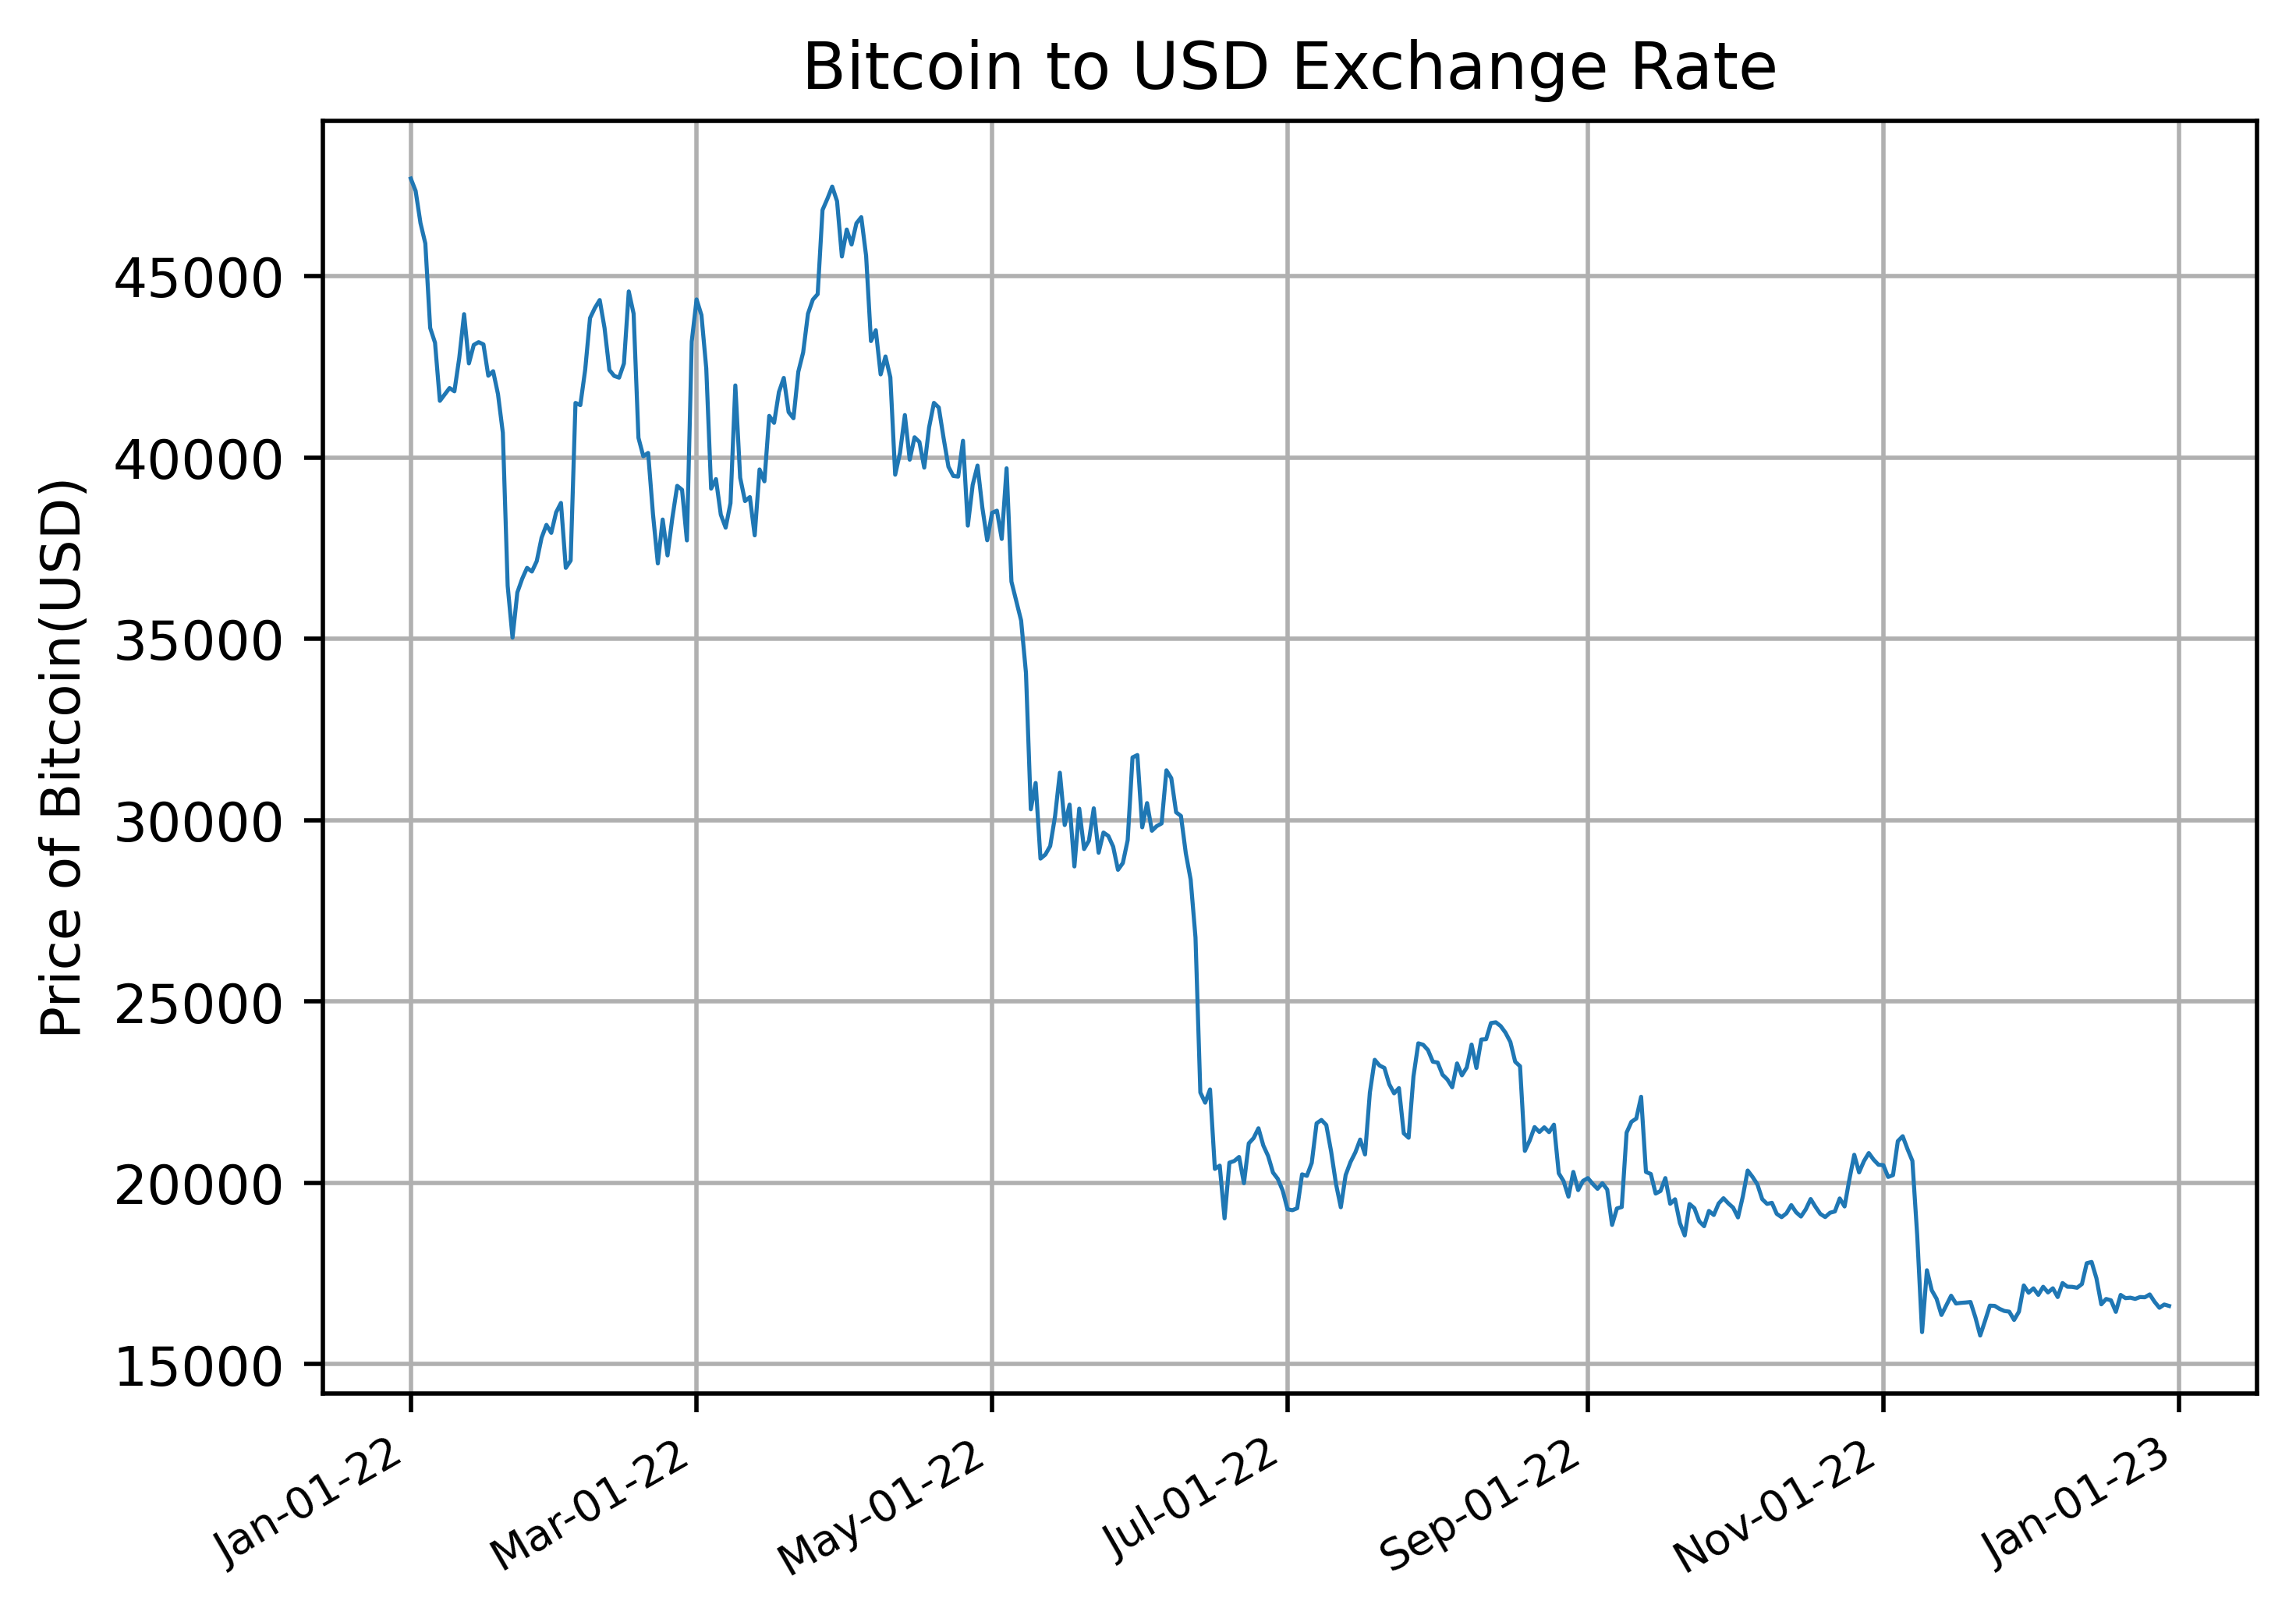

In [4]:
fig,ax = plt.subplots(dpi=500)

#formatting the date axis
date_format = DateFormatter("%h-%d-%y")
ax.xaxis.set_major_formatter(date_format)
ax.tick_params(axis='x',labelsize=8)
fig.autofmt_xdate()

#plotting the closing proce against the date(1 day interval)
ax.plot(BTC_USD['Close'], lw=0.75)

#adding labels and title to the plot
ax.set_ylabel('Price of Bitcoin(USD)')
ax.set_title('Bitcoin to USD Exchange Rate')
ax.grid()

#display the price chart
plt.show()

### Compute Simple Moving Average

In [5]:
#compute a 9-day Simple Moving Average
BTC_USD['SMA_9'] = BTC_USD['Close'].rolling(window=9, min_periods=1).mean()

In [6]:
#compute a 30-day Simple Moving Average
BTC_USD['SMA_30'] = BTC_USD['Close'].rolling(window=30,min_periods=1).mean()

In [7]:
#display the last five entries of the DataFrame
BTC_USD.tail()

,Open,High,Low,Close,Adj Close,Volume,SMA_9,SMA_30
Date,,,,,,,,
2022-12-26,16842.250000,16920.123047,16812.369141,16919.804688,16919.804688,11886957804,16795.370877,16955.040039
2022-12-27,16919.291016,16959.845703,16642.072266,16717.173828,16717.173828,15748580239,16790.837240,16964.124935
2022-12-28,16716.400391,16768.169922,16497.556641,16552.572266,16552.572266,17005713920,16803.380859,16975.299935
2022-12-29,16552.322266,16651.755859,16508.683594,16642.341797,16642.341797,14472237479,16774.051649,16981.878581
2022-12-30,16641.330078,16643.427734,16408.474609,16602.585938,16602.585938,15929162910,16750.168403,16963.012565


### Plot the Simple Moving Average

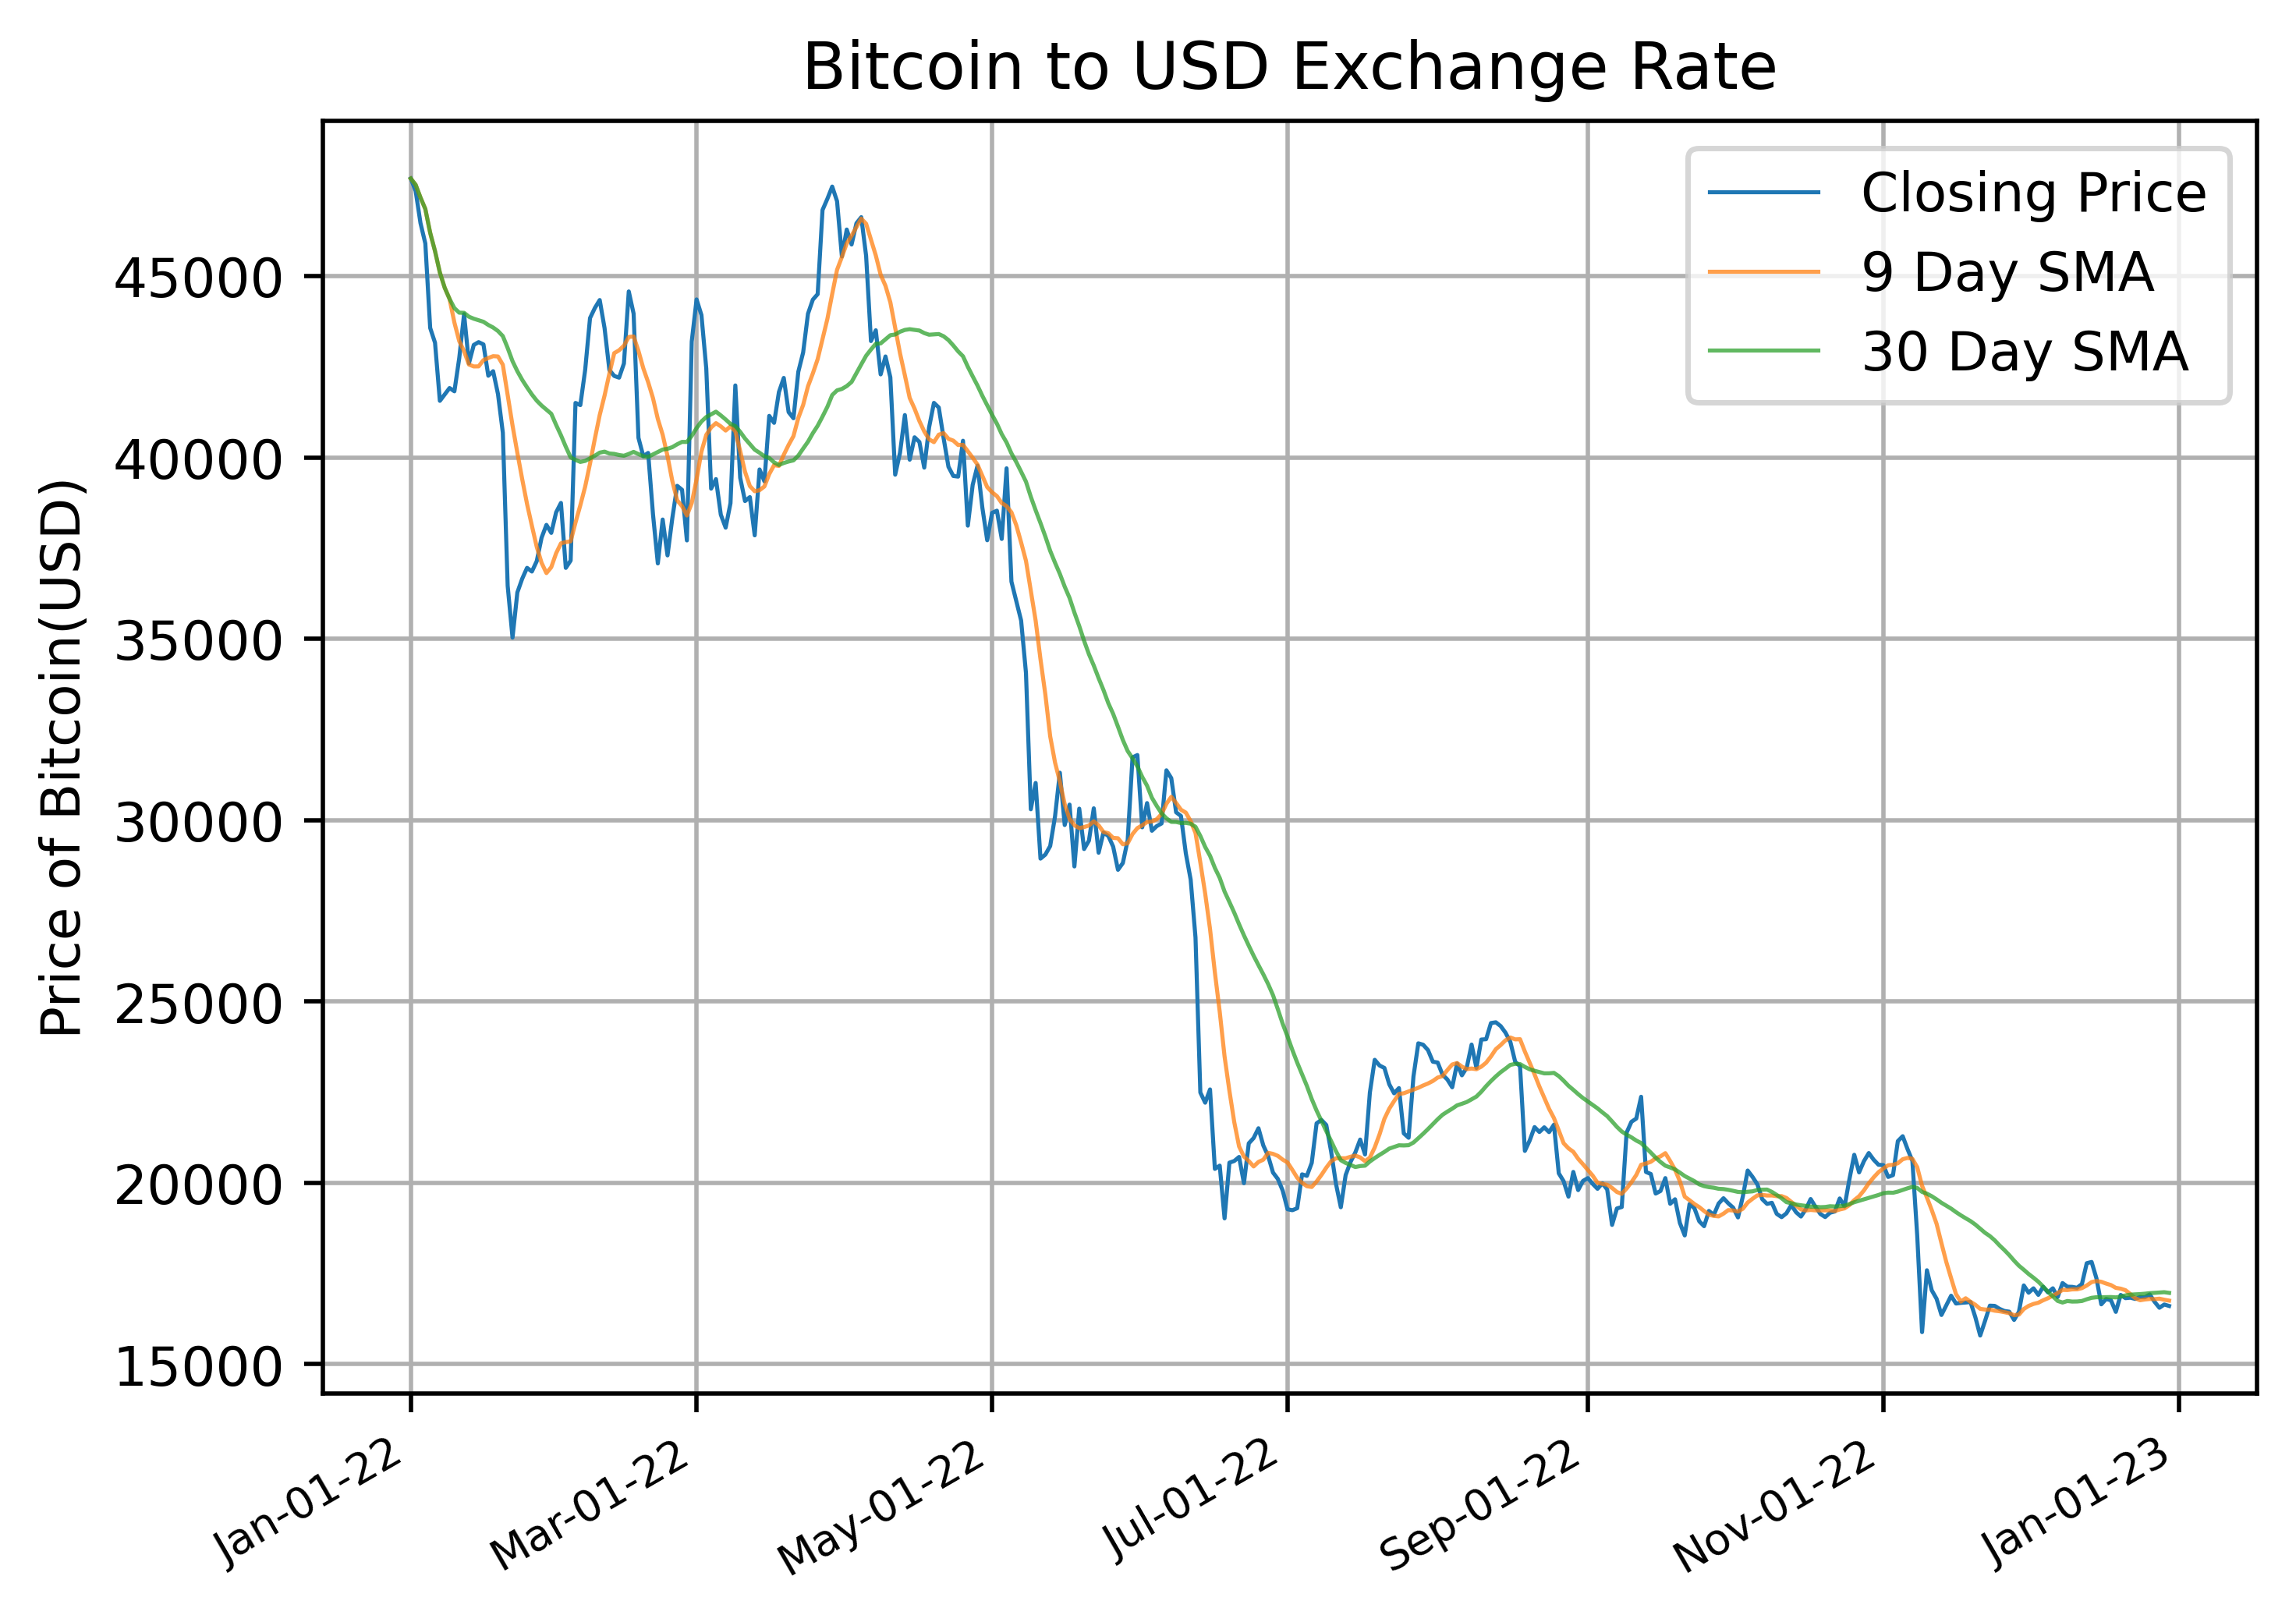

In [8]:
fig,ax = plt.subplots(dpi=500)

#formatting the date axis
date_format = DateFormatter("%h-%d-%y")
ax.xaxis.set_major_formatter(date_format)
ax.tick_params(axis='x',labelsize=8)
fig.autofmt_xdate()

#plotting the closing proce against the date(1 day interval)
ax.plot(BTC_USD['Close'], lw=0.75, label='Closing Price')
ax.plot(BTC_USD['SMA_9'], lw=0.75, alpha=0.75, label='9 Day SMA')
ax.plot(BTC_USD['SMA_30'], lw=0.75, alpha=0.75, label='30 Day SMA')

#add labels and title to the plot
ax.set_ylabel('Price of Bitcoin(USD)')
ax.set_title('Bitcoin to USD Exchange Rate')
ax.grid()
ax.legend()

#display the price chart
plt.show()

### Moving Average Crossover

In [9]:
#create a pandas dataframe same size as the BTC_USD dataframe
trade_signals = pd.DataFrame(index=BTC_USD.index)

#define the intervals for the fast anf SMA (in days)
short_interval = 10
long_intervals = 40

#compute the SMA and add it to the Dataframe
trade_signals['Short'] = BTC_USD['Close'].rolling(window=short_interval,min_periods=1).mean()
trade_signals['Long'] = BTC_USD['Close'].rolling(window=long_intervals,min_periods=1).mean()

In [10]:
#create a new column populated with zeros
trade_signals['Signal'] = 0.0

#wherever the shorter term SMA is above the longer term SMA,set the Signal column to 1, otherwise 0
trade_signals['Signal'] = np.where(trade_signals['Short'] > trade_signals['Long'],1.0,0.0)

In [11]:
#create the Positions column to buy/sell orders
trade_signals['Positions'] = trade_signals['Signal'].diff()

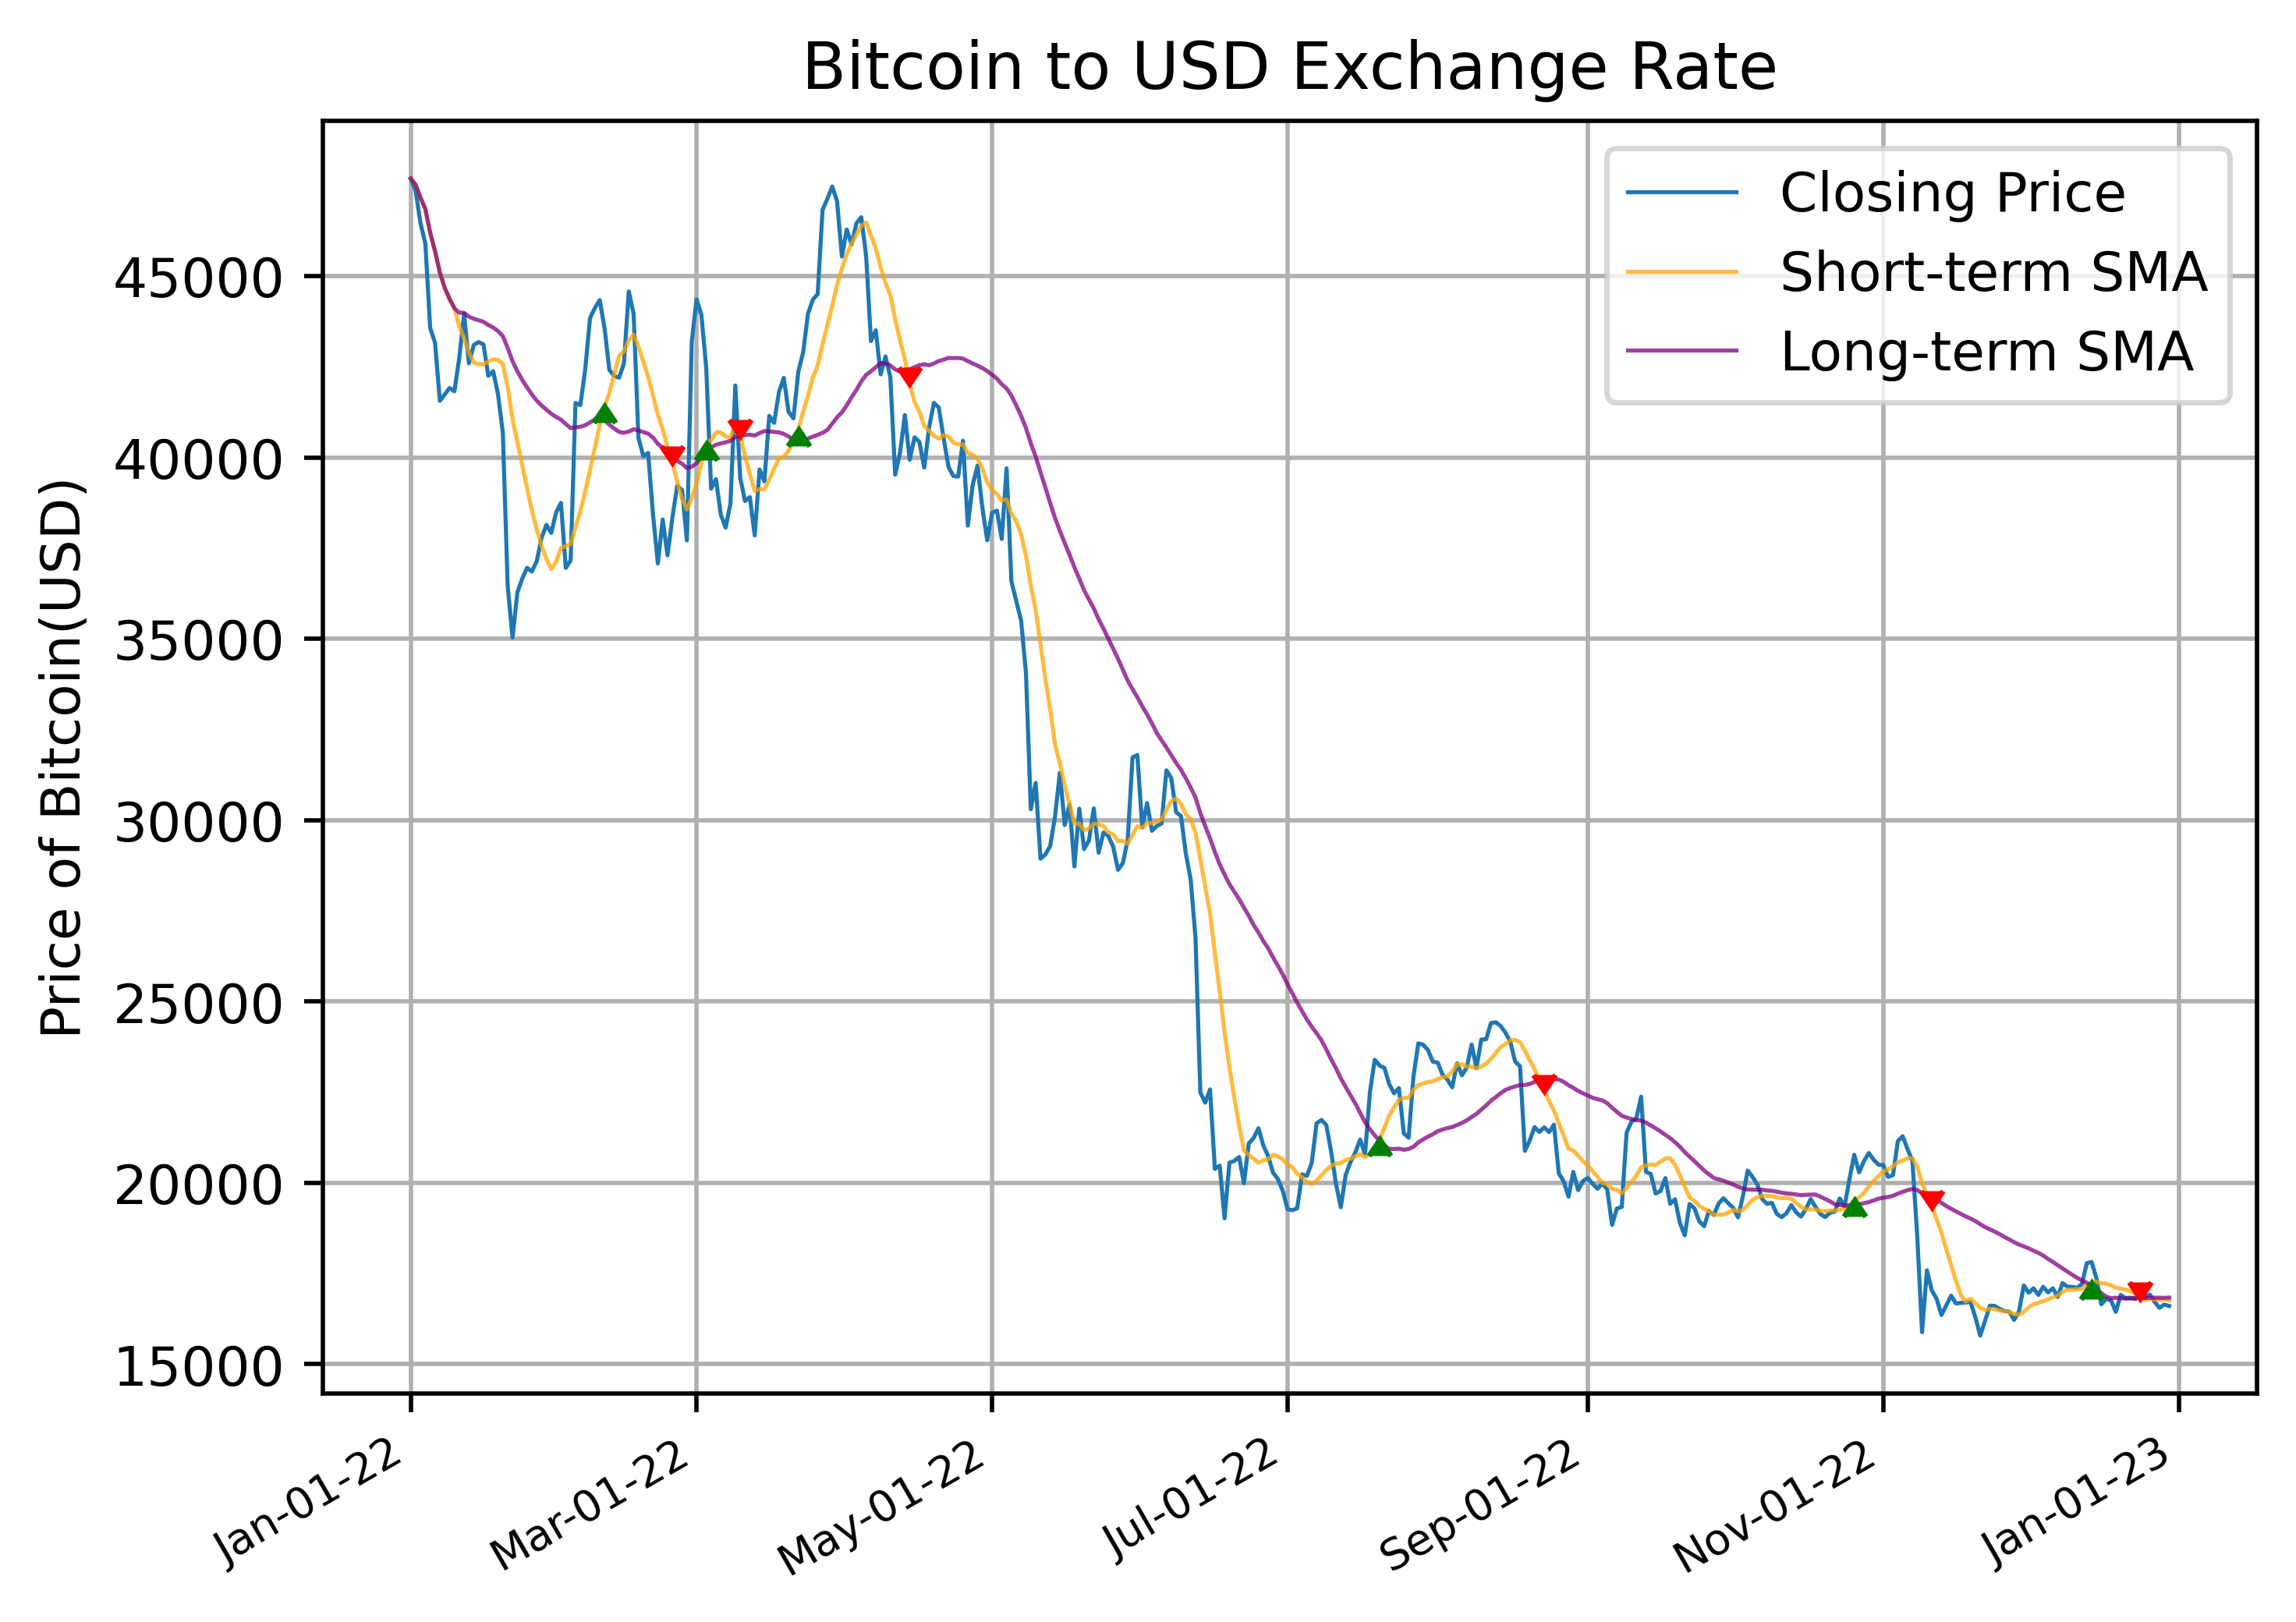

In [12]:
#visualize the algorithm trade
fig,ax = plt.subplots(dpi=500)

#format the date axis
date_format = DateFormatter("%h-%d-%y")
ax.xaxis.set_major_formatter(date_format)
ax.tick_params(axis='x', labelsize=8)
fig.autofmt_xdate()

#plot the bitcoin closing price (1 day interval)
ax.plot(BTC_USD['Close'], lw=0.75, label='Closing Price')

#plot the short-term moving average
ax.plot(trade_signals['Short'], lw=0.75, alpha=0.75, color='orange', label='Short-term SMA')

#plot the long-term moving average
ax.plot(trade_signals['Long'], lw=0.75, alpha=0.75, color='purple', label='Long-term SMA')

#adding green arrows to indicate buy orders
ax.plot(trade_signals.loc[trade_signals['Positions']==1.0].index, trade_signals.Short[trade_signals['Positions'] == 1.0], marker=6, ms=4, linestyle='none', color='green')

#adding red arrows to indicate sell orders
ax.plot(trade_signals.loc[trade_signals['Positions']== -1.0].index, trade_signals.Short[trade_signals['Positions'] == -1.0], marker=7, ms=4, linestyle='none', color='red')

#add labels and title
ax.set_ylabel('Price of Bitcoin(USD)')
ax.set_title('Bitcoin to USD Exchange Rate')
ax.grid()
ax.legend()

#display the price chart
plt.show()

### Backtest the Algorithm

In [13]:
#define how much money you will start with (in USD)
initial_balance = 10000.0

#create a Dataframe containing all the dates considered
backtest = pd.DataFrame(index=trade_signals.index)

#add a column containing the daily percent returns of Bitcoin
backtest['BTC_Return'] = BTC_USD['Close'] / BTC_USD['Close'].shift(1)

In [14]:
#add a column containing the daily percent return of the Moving Average Crossover strategy
backtest['Alg_Return'] = np.where(trade_signals.Signal == 1, backtest.BTC_Return, 1.0)

#add a column containing the daily value of the portfolio using the Crossover strategy
backtest['Balance'] = initial_balance * backtest.Alg_Return.cumprod()

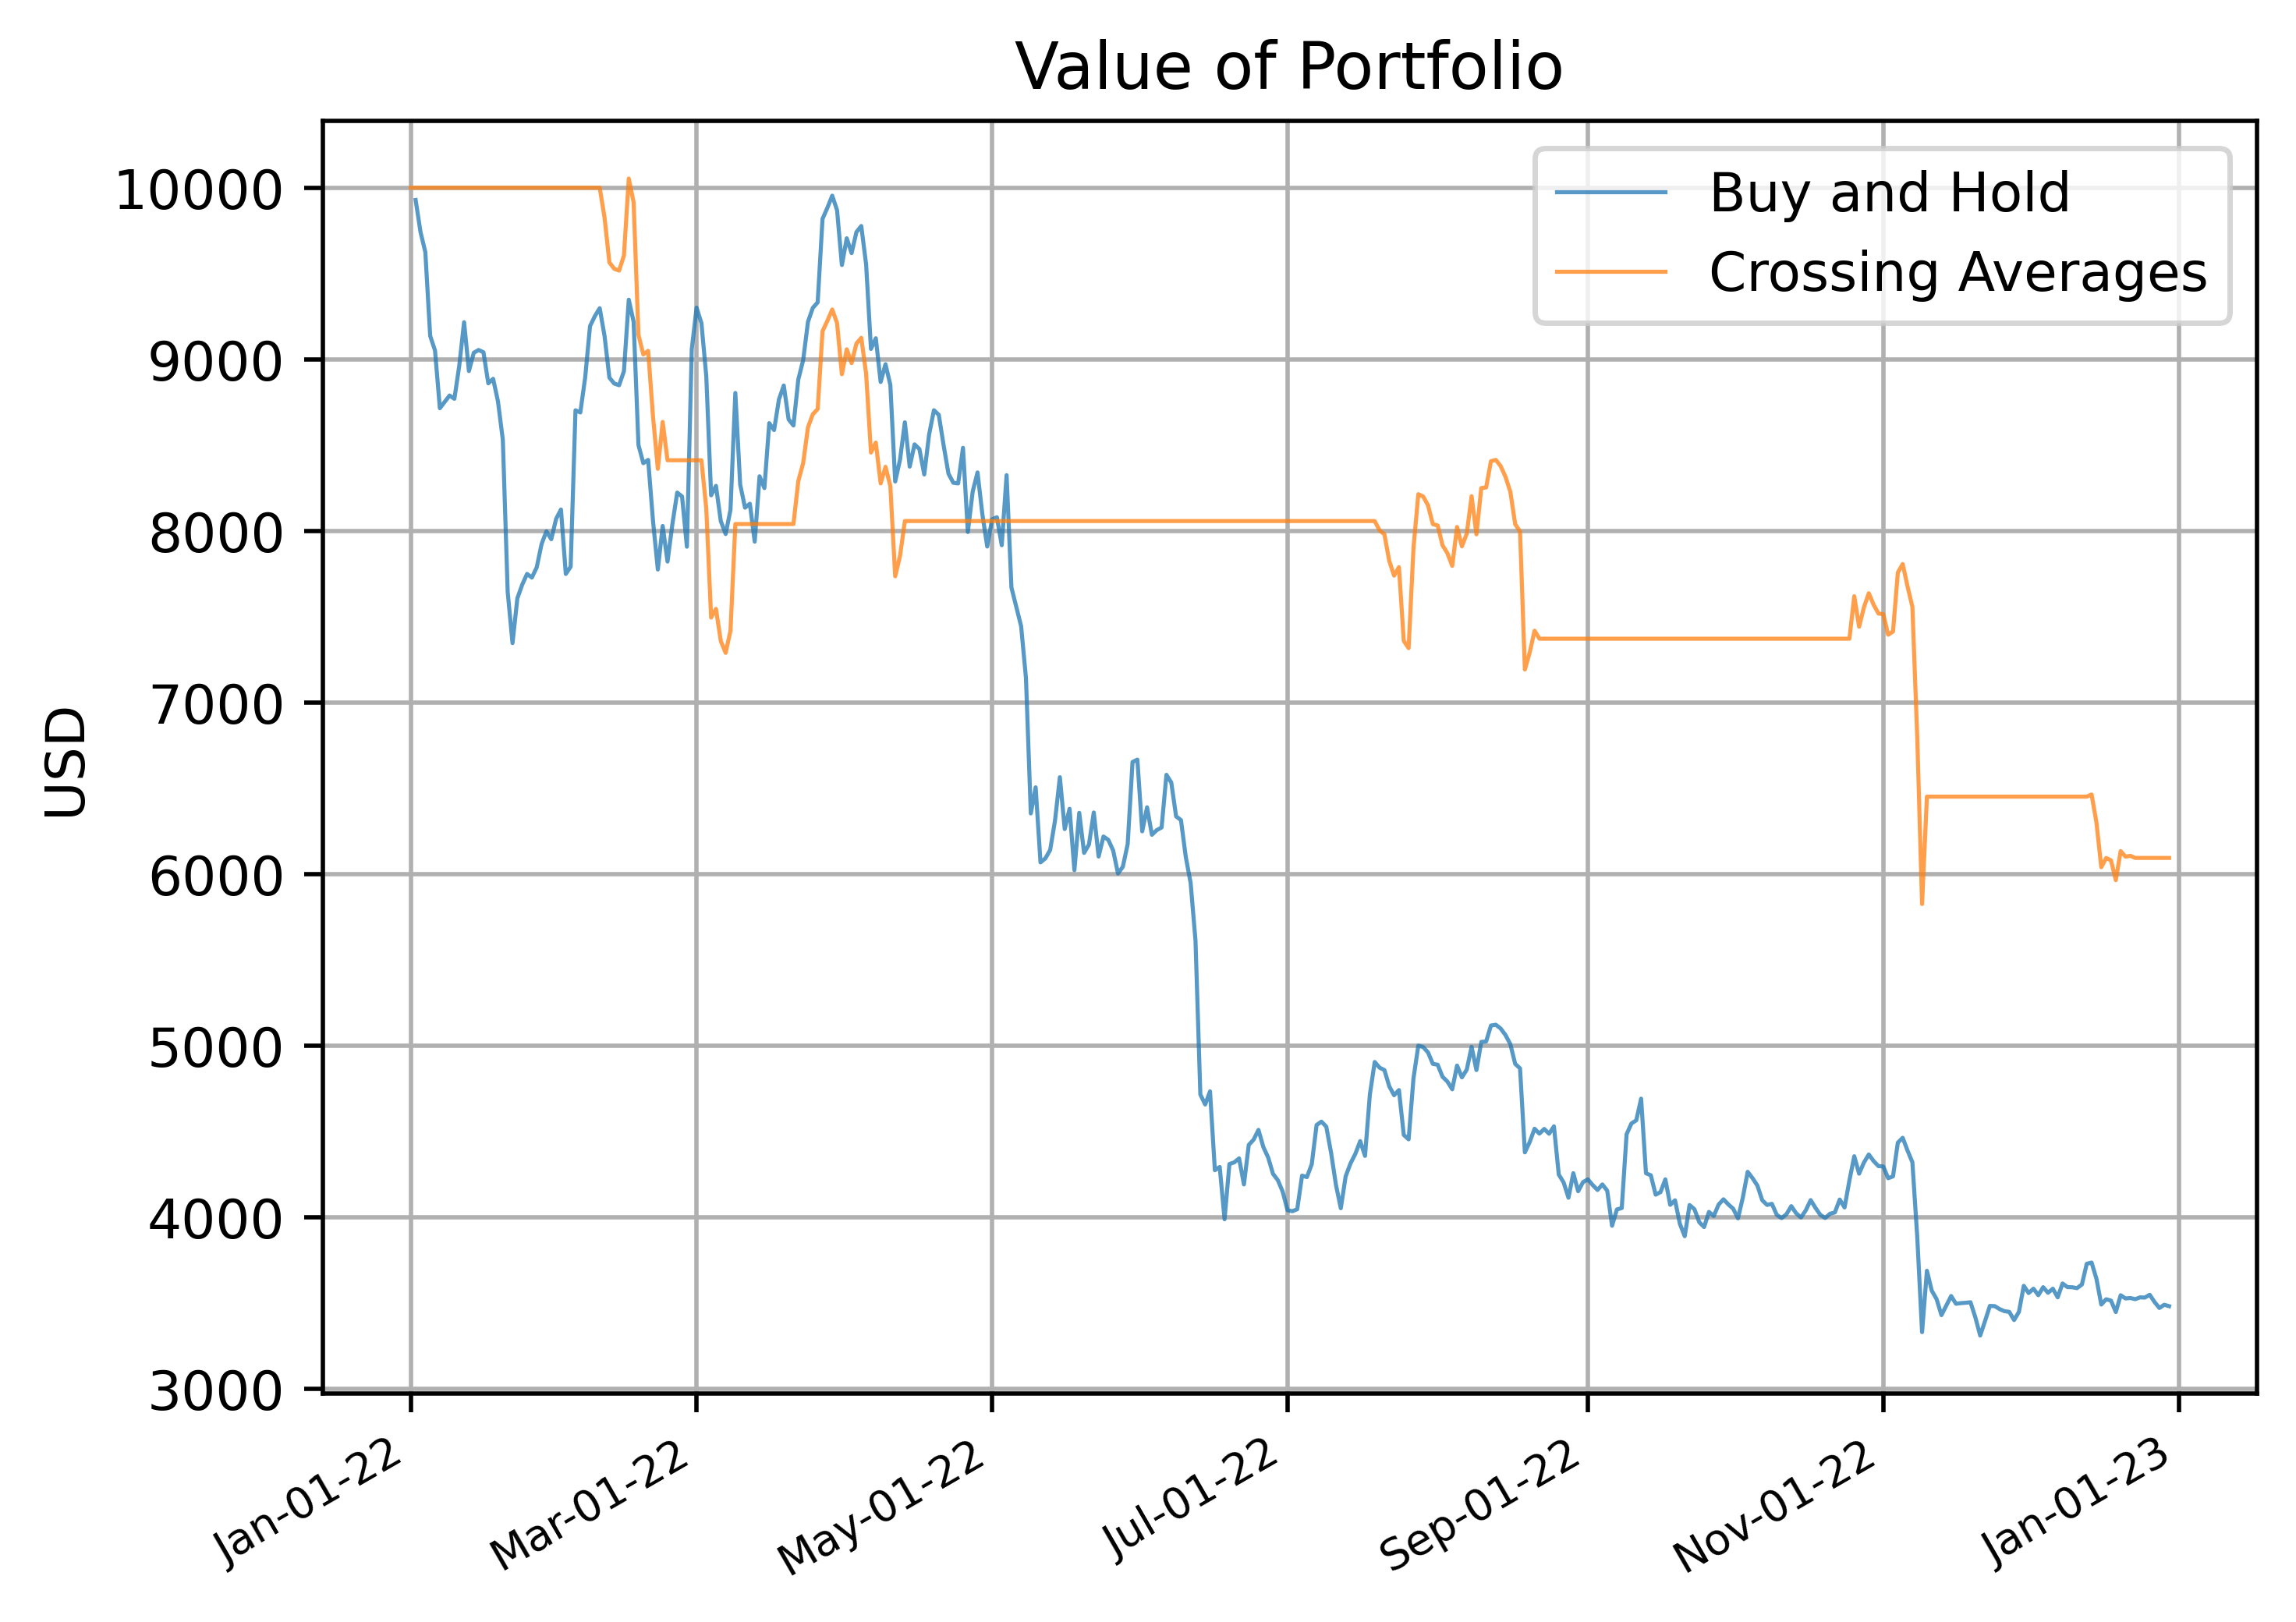

In [15]:
#make a plot to compare the performance of trading alghorithm implemented anf a simple "Buy and Hold" strategy
fig, ax = plt.subplots(dpi=500)

#Format the date axis
date_format = DateFormatter("%h-%d-%y")
ax.xaxis.set_major_formatter(date_format)
ax.tick_params(axis='x', labelsize=8)
fig.autofmt_xdate()

#plot the value of Buy and Hold strategy
ax.plot(initial_balance*backtest.BTC_Return.cumprod(), lw=0.75, alpha=0.75, label='Buy and Hold')

#plot total value of Crossing Average Strategy
ax.plot(backtest['Balance'], lw=0.75, alpha=0.75, label='Crossing Averages')

#add labels and title
ax.set_ylabel('USD')
ax.set_title('Value of Portfolio')
ax.grid()
ax.legend()

#display the price chart
plt.show()